In [155]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as pre

In [156]:
data_test = pd.read_csv("data_test.csv") 
data_train = pd.read_csv('data_train.csv')

data_train_original = pd.DataFrame(data_train)
data_test_original = pd.DataFrame(data_test)

print(len(data_train_original))
print(len(data_test_original))

#Eliminieren der NaN-Datensätze:
data_train_cleaned = data_train_original.dropna(axis=0, how='any')
data_test_cleaned = data_test_original.dropna(axis=0, how='any')

print(len(data_train_cleaned))
n_dropped = len(data_train_original)-len(data_train_cleaned)
print(n_dropped ,'Datensätze aus Train entfernt.')

print(len(data_test_cleaned))
n_dropped = len(data_test_original)-len(data_test_cleaned)
print(n_dropped ,'Datensätze aus Test entfernt.')

14703
3676
14703
0 Datensätze aus Train entfernt.
3676
0 Datensätze aus Test entfernt.


Die Daten sind also schon vorher von fehlenden Werten bereinigt worden. Später will ich die entsprechenden Daten gegen andere Aufbereitungen der Daten testen, deswegen erzeuge ich noch weitere DataFrames.

In [157]:
data_tr = data_train_cleaned
data_te = data_test_cleaned
data_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-118.29,34.04,48.0,1353.0,488.0,1945.0,487.0,2.4359,123700.0,0.0,1.0,0.0,0.0,0.0
1,-122.05,37.36,29.0,1733.0,255.0,679.0,278.0,7.5337,406800.0,0.0,1.0,0.0,0.0,0.0
2,-118.42,34.19,33.0,3353.0,790.0,2318.0,775.0,2.2589,269700.0,0.0,1.0,0.0,0.0,0.0
3,-122.22,37.79,44.0,1487.0,314.0,961.0,272.0,3.5156,109500.0,1.0,0.0,0.0,0.0,0.0
4,-116.95,32.81,31.0,1277.0,293.0,698.0,237.0,3.1106,147700.0,0.0,1.0,0.0,0.0,0.0


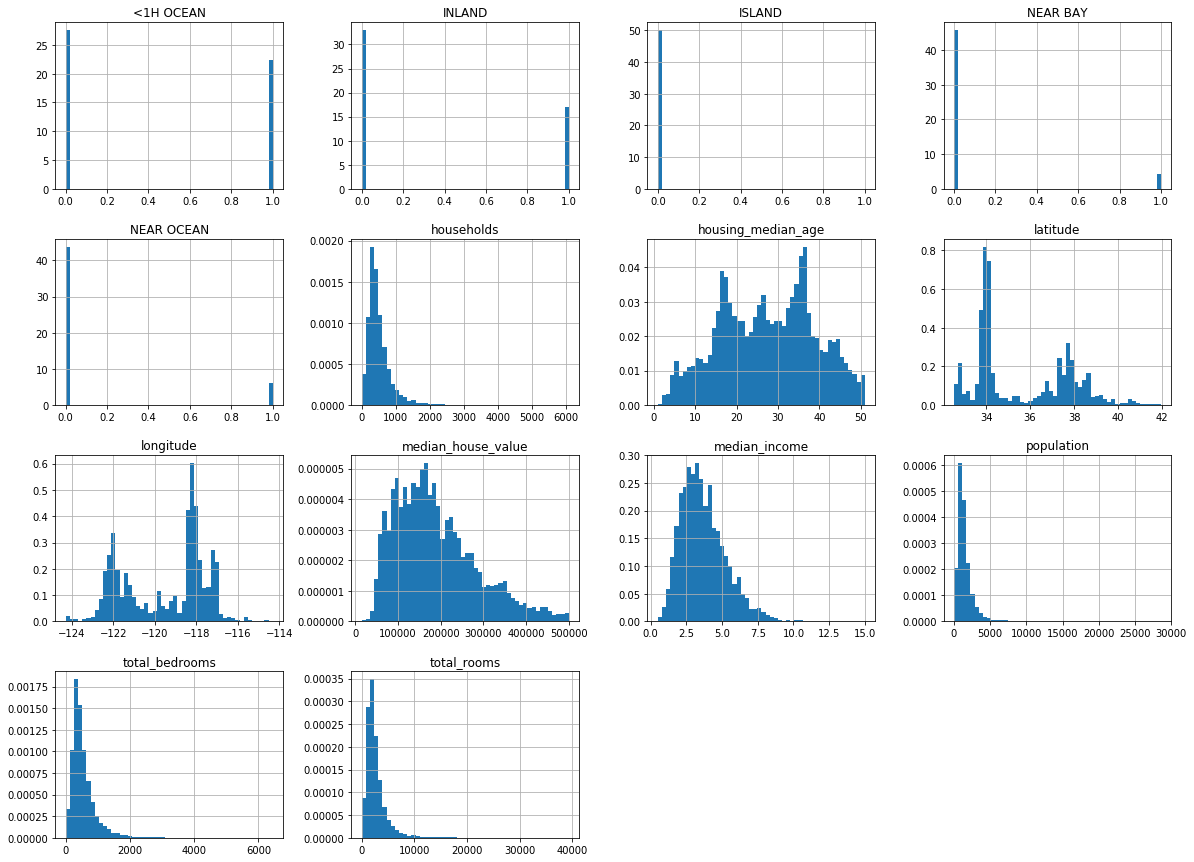

In [158]:
data_tr.hist(bins=50, density=True, figsize=(20,15));

In [159]:
import sklearn.preprocessing as pre
data_tr.loc[:,'median_house_value']
scaler = pre.StandardScaler(copy=True, with_mean=True, with_std=True)
data_tr_scaled = scaler.fit_transform(data_tr)
data_tr_scaled
data_tr = pd.DataFrame(data_tr_scaled, columns = data_train.columns)


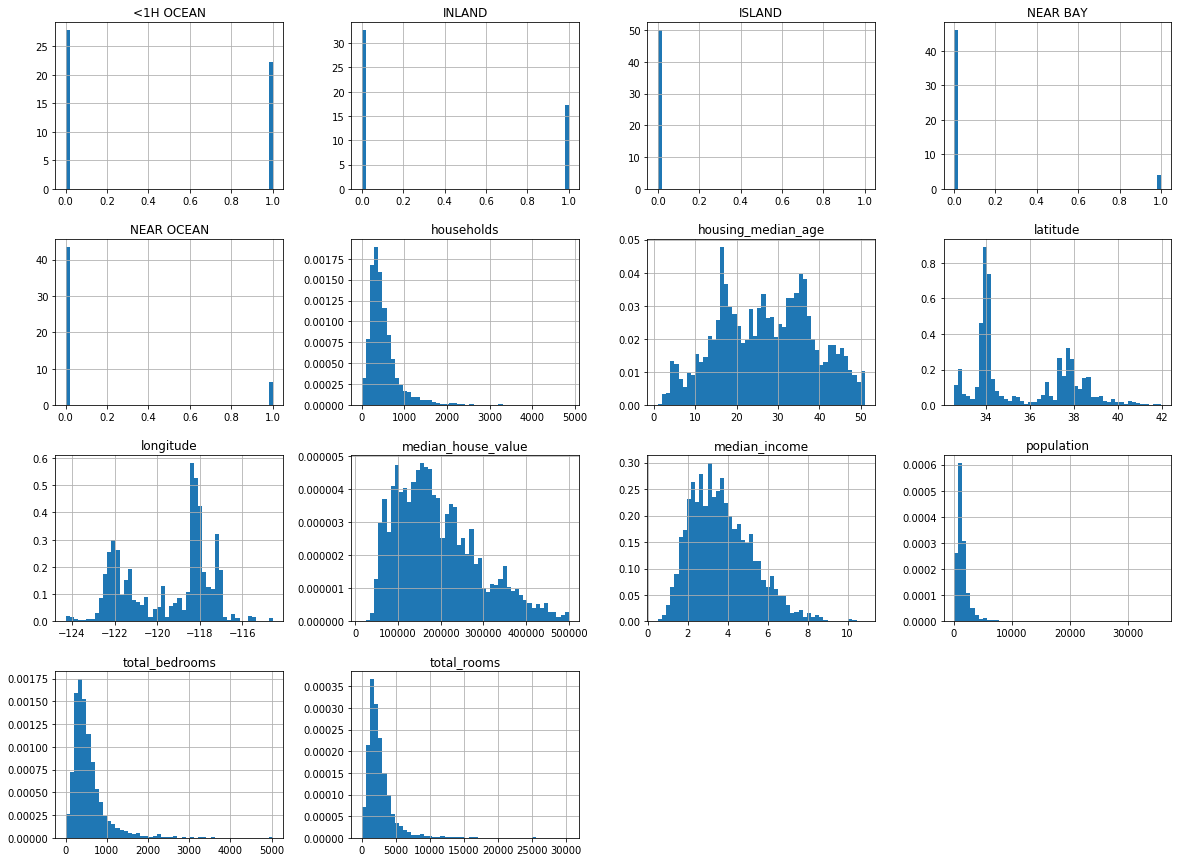

In [161]:
data_te.hist(bins=50, density=True, figsize=(20,15));

In [167]:
#Train
from sklearn import linear_model as lm # importieren der Klasse
lr = lm.LinearRegression()# instanziieren der Klasse
y = data_tr.loc[:,'median_house_value']
X = data_tr.drop('median_house_value',axis=1)

lr.fit(X, y)
print('Bestimmtheitsmaß: ',lr.score(X,y))
MSE_lr = ((sum((y_predicted - y)**2))/len(y))
print(MSE_lr)

Bestimmtheitsmaß:  0.6243706488985612


ValueError: operands could not be broadcast together with shapes (14703,) (3676,) 

In [163]:
import sklearn.preprocessing as pre
data_te.loc[:,'median_house_value']
scaler = pre.StandardScaler(copy=True, with_mean=True, with_std=True)
data_te_scaled = scaler.fit_transform(data_te)
data_te_scaled
data_te = pd.DataFrame(data_te_scaled, columns = data_train.columns)
X = data_te.drop('median_house_value',axis=1)
y = data_te.loc[:,'median_house_value']
print('Bestimmtheitsmaß: ',lr.score(X,y))

Bestimmtheitsmaß:  0.6149990566878223


[-0.48, -0.48, 0.08, -0.16, 0.37, -0.38, 0.22, 0.63, -0.01, 0.08, -0.13, 0.07, 0.01]


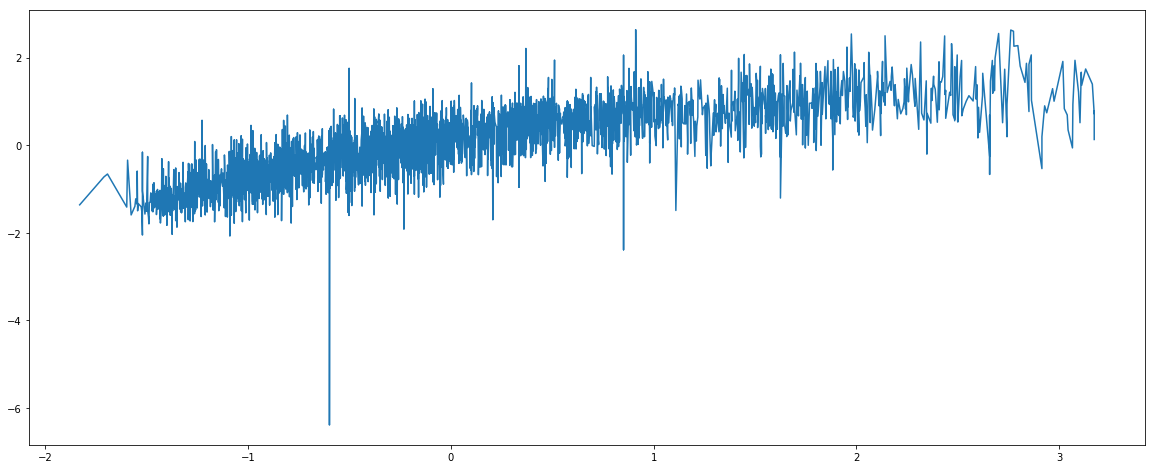

In [164]:
y_predicted = lr.predict(X)
predictions = pd.DataFrame()
predictions['true_median_house_value'] = y
predictions['prediction'] = y_predicted
predictions.sort_values(by ='true_median_house_value', axis = 0, ascending=True, inplace=True)
plt.figure(figsize=(20,8))
plt.plot(predictions['true_median_house_value'],predictions['prediction']);
print(list(map(lambda x:x.round(2), lr.coef_)))


[-0.48, -0.48, 0.08, -0.16, 0.37, -0.38, 0.22, 0.63, -0.01, 0.08, -0.13, 0.07, 0.01]


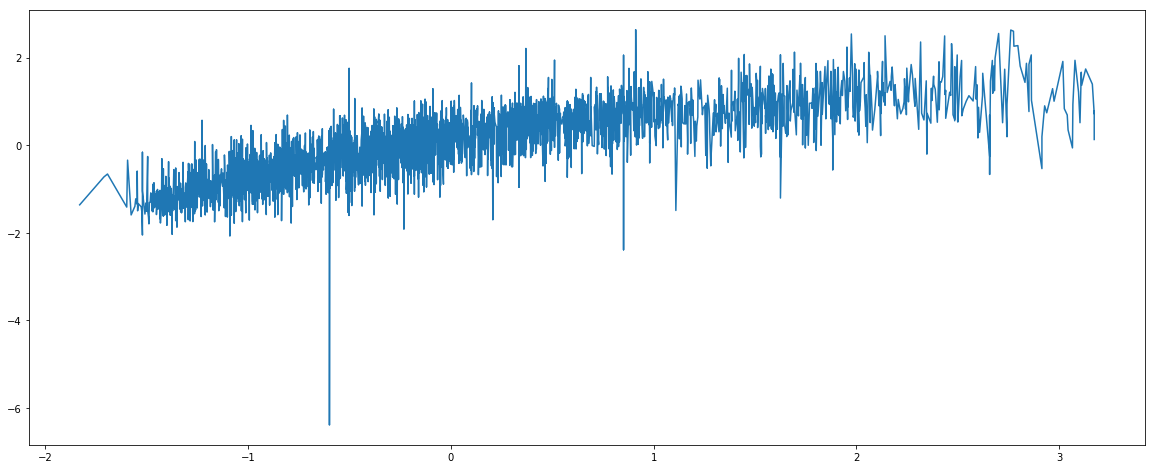

In [165]:
y_predicted = lr.predict(X)
predictions = pd.DataFrame()
predictions['true_median_house_value'] = y
predictions['prediction'] = y_predicted
predictions.sort_values(by ='true_median_house_value', axis = 0, ascending=True, inplace=True)
plt.figure(figsize=(20,8))
plt.plot(predictions['true_median_house_value'],predictions['prediction']);
print(list(map(lambda x:x.round(2), lr.coef_)))

In [166]:
list(map(lambda x:x.round(2), asd))

[-23114.92,
 -21135.22,
 661.56,
 -6.77,
 82.6,
 -32.38,
 53.61,
 38197.7,
 -26607.77,
 -9606.18,
 -49810.06,
 -4455.48,
 90479.49]

In [23]:
X = data_train.drop('median_house_value',axis=1)

In [25]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-118.29,34.04,48.0,1353.0,488.0,1945.0,487.0,2.4359,0.0,1.0,0.0,0.0,0.0
1,-122.05,37.36,29.0,1733.0,255.0,679.0,278.0,7.5337,0.0,1.0,0.0,0.0,0.0
2,-118.42,34.19,33.0,3353.0,790.0,2318.0,775.0,2.2589,0.0,1.0,0.0,0.0,0.0
3,-122.22,37.79,44.0,1487.0,314.0,961.0,272.0,3.5156,1.0,0.0,0.0,0.0,0.0
4,-116.95,32.81,31.0,1277.0,293.0,698.0,237.0,3.1106,0.0,1.0,0.0,0.0,0.0


In [20]:
from sklearn import linear_model as lr # importieren der Klasse
lr = lr.LinearRegression()                             # instanziieren der Klasse
lr.fit(data_train, y)

y_lr_predicted = lr.predict(X)


plt.plot(X,y_lr_predicted)


results_lr = pd.DataFrame(X)
results_lr['Vorhersage'] = y_lr_predicted
results_lr['y'] = y
MSE_lr = ((sum((y_predicted - y)**2))/len(y))

NameError: name 'y' is not defined